In [143]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments import supervise, autoencode, simulate, simulate_or_load, make_key
from localization.utils import ipr, plot_receptive_fields, plot_rf_evolution, build_gaussian_covariance, build_non_gaussian_covariance, entropy_sort, build_DRT
from scipy.special import erf
from tqdm import tqdm
import itertools

In [156]:
config = dict(
    seed=0,
    num_dimensions=100,
    # num_hiddens=60,
    num_hiddens=10,#10,
    # gain=100,
    gain=100,
    init_scale=0.001,
    activation='relu',
    # activation='sigmoid',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,# bias_value=-1.0, bias_trainable=False,
    optimizer_fn=optax.sgd, learning_rate=10*0.15,#10*0.15,#40*0.15,#10*1.,#3.0,
    # optimizer_fn=optax.adam, learning_rate=0.1,
    batch_size=5000,
    num_epochs=1000,
    dataset_cls=datasets.NortaDataset,
    # marginal_qdf=datasets.LaplaceQDF(),
    # marginal_qdf=datasets.GaussianQDF(),
    # marginal_qdf=datasets.UniformQDF(),
    # marginal_qdf=datasets.BernoulliQDF(),
    marginal_qdf=datasets.AlgQDF(4), 
    # K = 1:  4.5 does not localize! neither does 5! but 5.5 does (indeed, starting in Desmos reveals varphi is super-linear)
    # K = 10: 5 does localize (kinda...), 4 also does..., 2 does not! - interaction effects are really increasing error margin for 
    # dataset_cls=datasets.NonlinearGPDataset,
    # xi=(1, 3,),
    xi=(0.1, 5),
    # xi=(0.5, 0.4,),
    # xi=(5, 4, 0.3, 0.2, 0.1,),
    num_steps=2500,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=100,
)

# log config to wandb
wandb_ = False

Approximate standard deviation: 0.7745461679507035


NortaDataset[-1.00,01.00]_xi1=05.00_xi2=00.10_gain=100.000_p=0.50_batch_size=5000_num_epochs=2500_loss=mse_lr=0.150_SimpleNetnobias_L=100_K=001_activation=relu_init_scale=0.001_xavier_normal_init_seed=0.npz
NortaDataset[-1.00,01.00]_xi1=05.00_xi2=00.10_gain=100.000_p=0.50_batch_size=5000_num_epochs=2500_loss=mse_lr=0.150_SimpleNetnobias_L=100_K=001_activation=relu_init_scale=0.001_xavier_normal_init_seed=0

NortaDataset[-1.00,01.00]_xi1=05.00_xi2=00.10_gain=100.000_p=0.50_batch_size=5000_num_epochs=1000_loss=mse_lr=1.500_SimpleNetnobias_L=100_K=010_activation=relu_init_scale=0.001_xavier_normal_init_seed=0
Already simulated


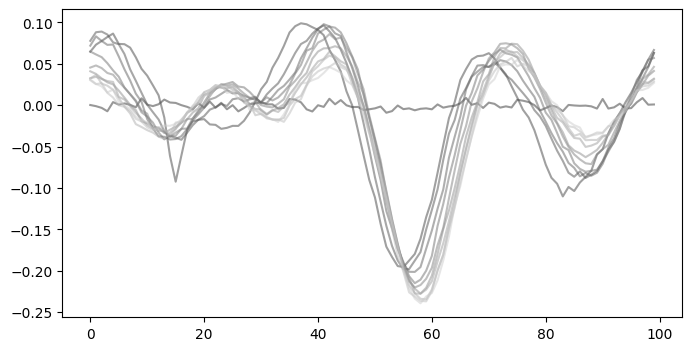

In [159]:
weights, metrics = simulate_or_load(supervise=True, wandb_=False, **config)
fig, axs = plot_rf_evolution(weights[:,[2],:], figsize=(8, 4))

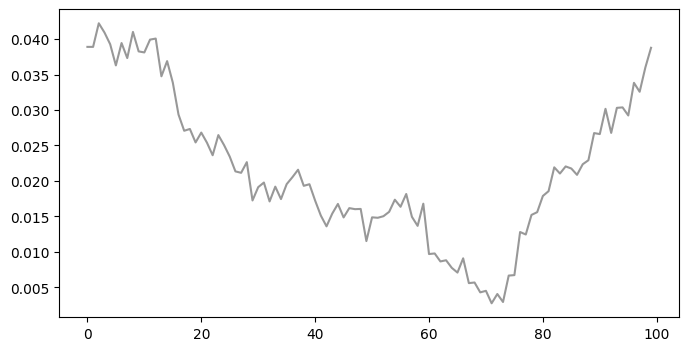

In [131]:
fig, axs = plot_rf_evolution(weights[-1:,[0],:], figsize=(8, 4))

In [101]:
jnp.mean(weights == weights1)

Array(1., dtype=float32)

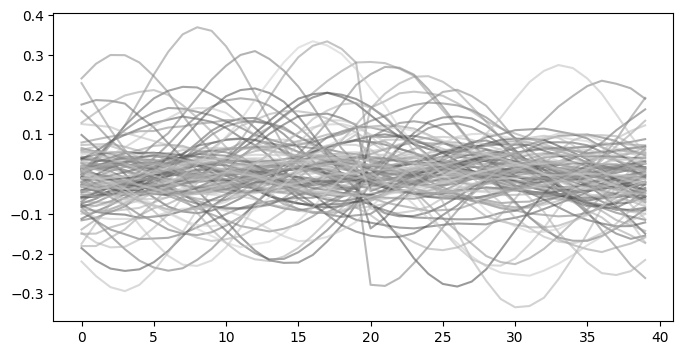

In [6]:
fig, axs = plot_rf_evolution(weights[[-1],:,:].reshape(-1,1,40), figsize=(8, 4))

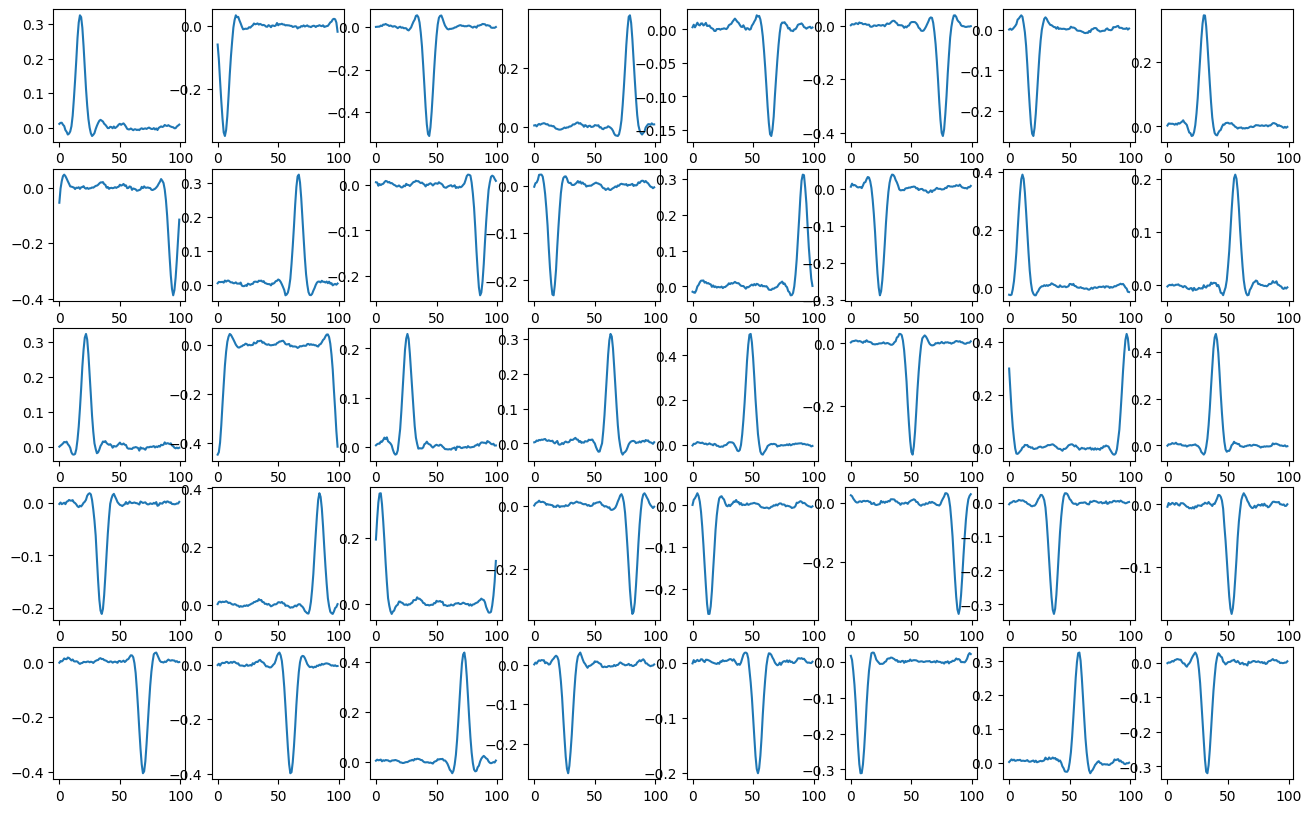

In [31]:
fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flatten()):
    ax.plot(weights[-1,i,:])